In [50]:
# fast f1 only usable in python 3.8 and 3.9
!python --version

Python 3.9.13


In [51]:
%pip install -r requirements.txt

You should consider upgrading via the '/home/dhupee/Projects/Fastf1-head2head/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import fastf1
from fastf1 import plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd
import os

# make cache directory if doesn't exist
if not os.path.exists('cache'):
    os.makedirs('cache')
else:
    print('cache dir exist')

# Setup plotting
plotting.setup_mpl()

# Enable the cache
fastf1.Cache.enable_cache('cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

cache dir exist


In [53]:
# add session
sessions = fastf1.get_session(2022, 'Belgium', 'Q')
sessions.load(laps=True, telemetry=True, weather=True)

# assign driver
first_driver = 'SAI'
second_driver = 'PER'

# assign driver color
first_color = fastf1.plotting.team_color('FER')
second_color = fastf1.plotting.team_color('RBR')

# assign plot title
plot_title = 'Sainz vs Perez, Spa 2022 Q3'
second_plot_title = 'Carlos Sainz(55) Lap Gear Visualization'

speedmap_first_title = 'Carlos Sainz Speed Map'

# load fastest drivers
first = sessions.laps.pick_driver(first_driver).pick_fastest()
second = sessions.laps.pick_driver(second_driver).pick_fastest()

core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '22', '20', '18', '77', '23', '6', '44', '3', '10', '31', '5', '16', '63', '14', '4', '55', '1', '24', '47']


In [54]:
first_car_data = first.get_car_data().add_distance()
first_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-08-27 15:15:53.823,11149,241,6,100,False,12,car,0 days 00:00:00.026000,0 days 01:30:52.815000,1.740556
1,2022-08-27 15:15:54.063,11411,245,6,100,False,12,car,0 days 00:00:00.266000,0 days 01:30:53.055000,18.073889
2,2022-08-27 15:15:54.263,11615,250,6,100,False,12,car,0 days 00:00:00.466000,0 days 01:30:53.255000,31.962778
3,2022-08-27 15:15:54.503,11780,256,6,100,False,12,car,0 days 00:00:00.706000,0 days 01:30:53.495000,49.029444
4,2022-08-27 15:15:54.662,11530,258,6,100,False,12,car,0 days 00:00:00.865000,0 days 01:30:53.654000,60.424444
...,...,...,...,...,...,...,...,...,...,...,...
395,2022-08-27 15:17:37.023,10788,202,5,99,False,12,car,0 days 00:01:43.226000,0 days 01:32:36.015000,6879.943611
396,2022-08-27 15:17:37.263,11527,208,5,99,False,12,car,0 days 00:01:43.466000,0 days 01:32:36.255000,6893.810278
397,2022-08-27 15:17:37.463,11758,212,5,99,False,12,car,0 days 00:01:43.666000,0 days 01:32:36.455000,6905.588056
398,2022-08-27 15:17:37.623,11878,221,5,99,False,12,car,0 days 00:01:43.826000,0 days 01:32:36.615000,6915.410278


In [55]:
second_car_data = second.get_car_data().add_distance()
second_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-08-27 15:15:39.583,10966,240,6,100,False,12,car,0 days 00:00:00.109000,0 days 01:30:38.575000,7.266667
1,2022-08-27 15:15:39.823,11122,247,6,100,False,12,car,0 days 00:00:00.349000,0 days 01:30:38.815000,23.733333
2,2022-08-27 15:15:39.983,11305,250,6,100,False,12,car,0 days 00:00:00.509000,0 days 01:30:38.975000,34.844444
3,2022-08-27 15:15:40.343,11526,258,6,100,False,12,car,0 days 00:00:00.869000,0 days 01:30:39.335000,60.644444
4,2022-08-27 15:15:40.743,10623,265,7,100,False,12,car,0 days 00:00:01.269000,0 days 01:30:39.735000,90.088889
...,...,...,...,...,...,...,...,...,...,...,...
393,2022-08-27 15:17:22.743,10979,193,4,100,False,12,car,0 days 00:01:43.269000,0 days 01:32:21.735000,6850.895278
394,2022-08-27 15:17:23.023,10953,209,5,100,False,12,car,0 days 00:01:43.549000,0 days 01:32:22.015000,6867.150833
395,2022-08-27 15:17:23.223,11292,216,5,100,False,12,car,0 days 00:01:43.749000,0 days 01:32:22.215000,6879.150833
396,2022-08-27 15:17:23.543,11700,225,5,100,False,12,car,0 days 00:01:44.069000,0 days 01:32:22.535000,6899.150833


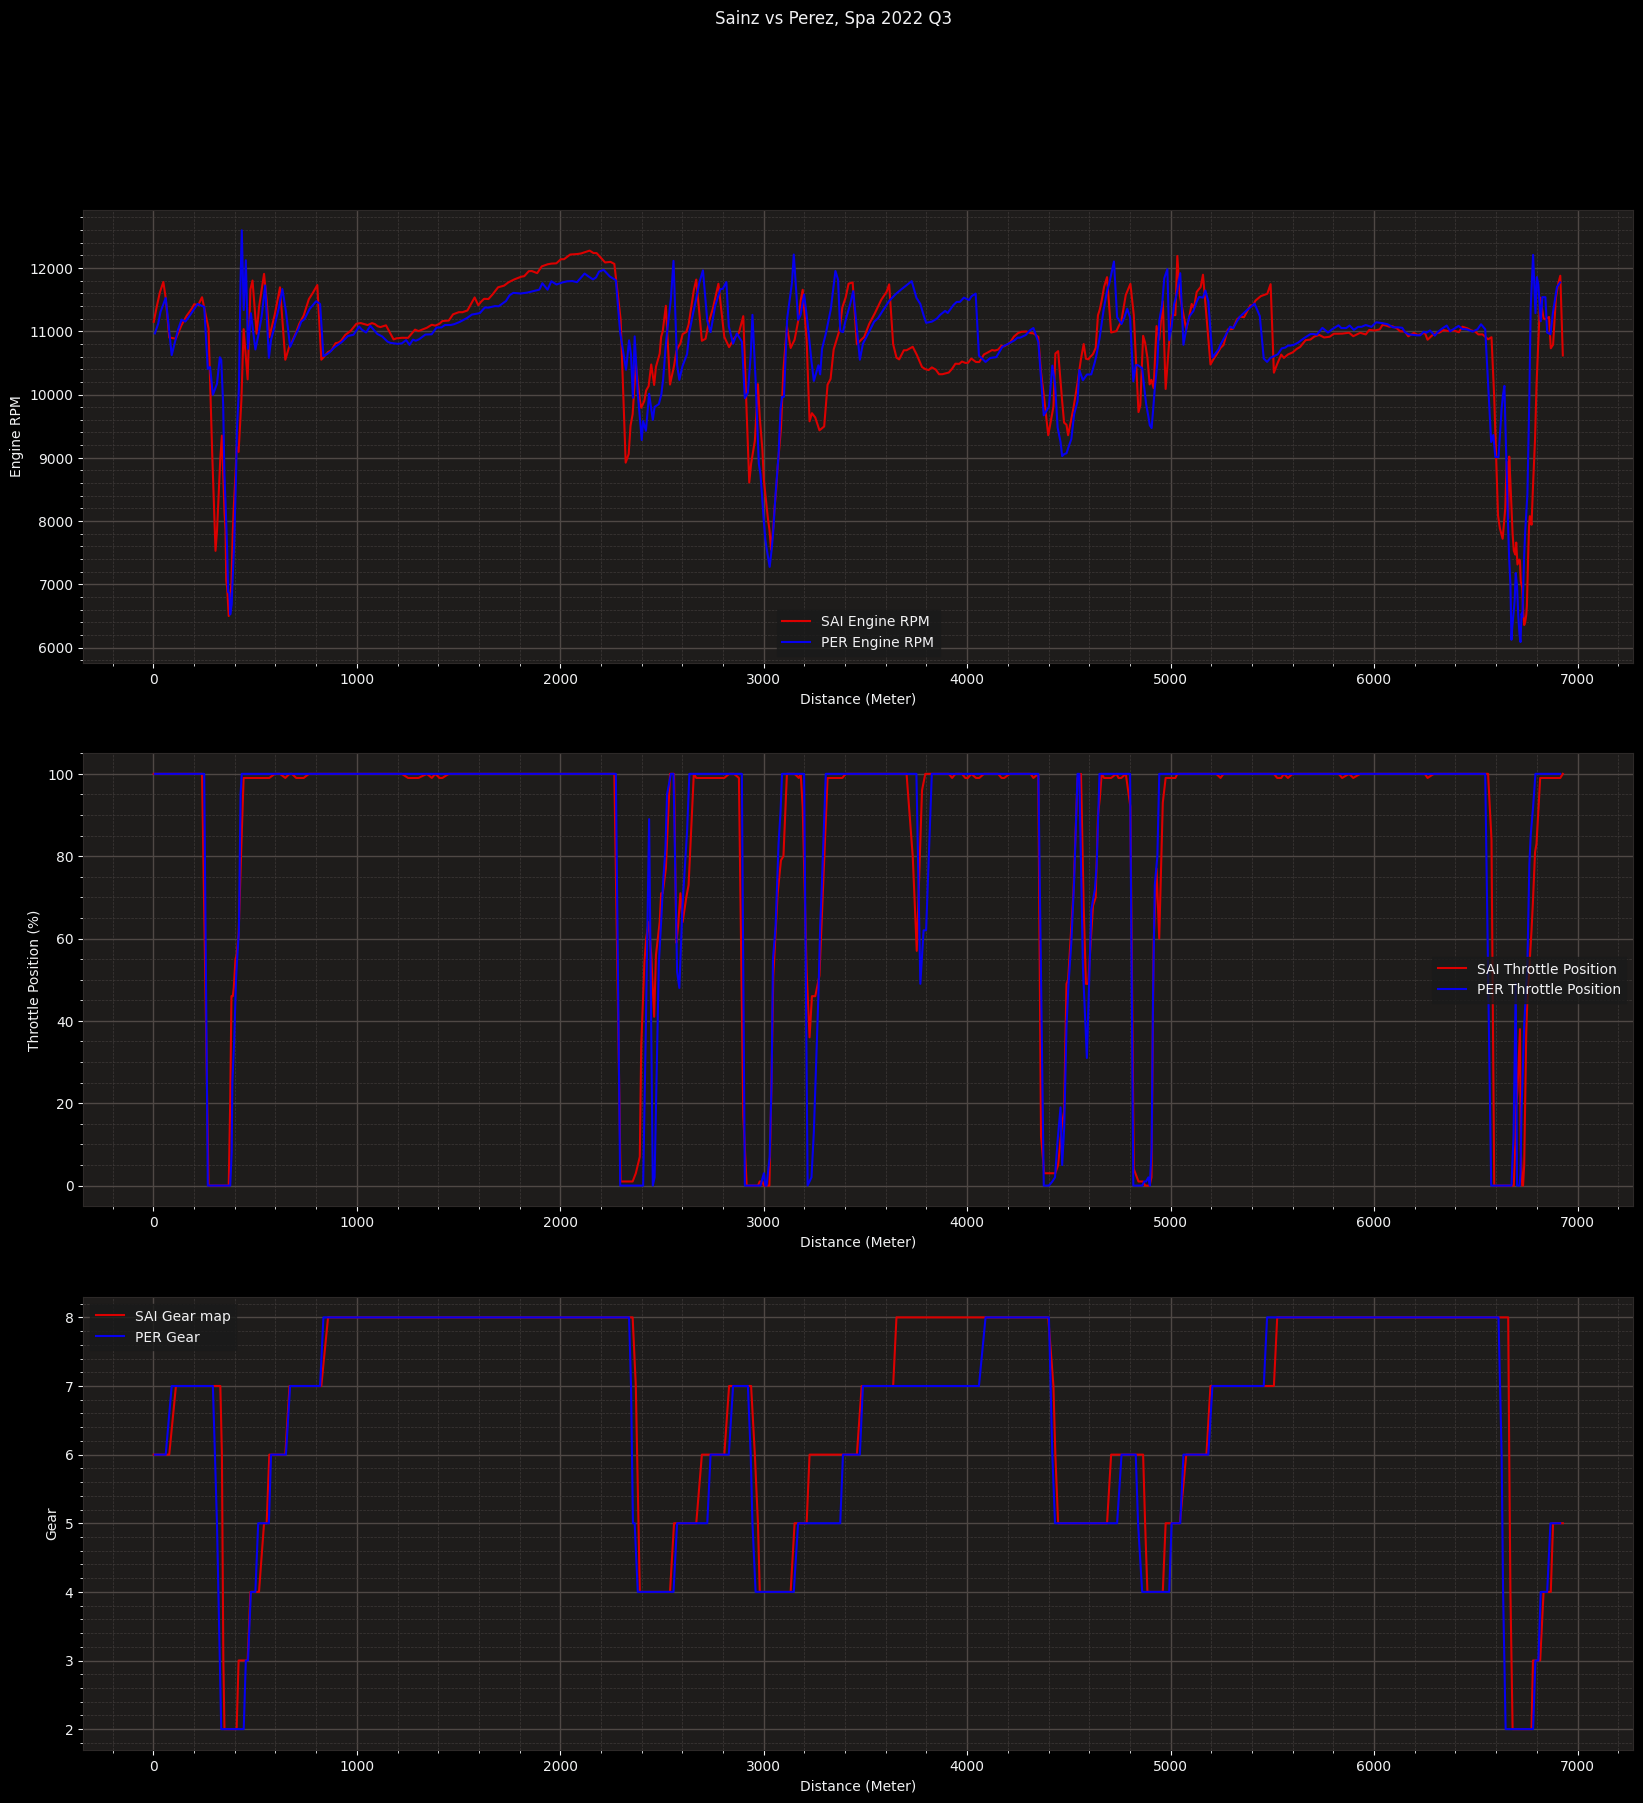

In [56]:
#plot first quali RPM
first_rpm = first_car_data['RPM']
first_tps = first_car_data['Throttle']
first_distance = first_car_data['Distance']
first_gear = first_car_data['nGear']

#plot second quali RPM
second_rpm = second_car_data['RPM']
second_tps = second_car_data['Throttle']
second_distance = second_car_data['Distance']
second_gear = second_car_data['nGear']

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,20), facecolor='black')
fig.suptitle(plot_title)

ax1.plot(first_distance, first_rpm, color=first_color , label = '{} Engine RPM'.format(first_driver))
ax1.plot(second_distance, second_rpm, color=second_color , label = '{} Engine RPM'.format(second_driver))
ax1.set_xlabel('Distance (Meter)')
ax1.set_ylabel('Engine RPM')
ax1.legend()

ax2.plot(first_distance, first_tps, color=first_color , label = '{} Throttle Position'.format(first_driver))
ax2.plot(second_distance, second_tps, color=second_color , label = '{} Throttle Position'.format(second_driver))
ax2.set_xlabel('Distance (Meter)')
ax2.set_ylabel('Throttle Position (%)')
ax2.legend()

ax3.plot(first_distance, first_gear, color=first_color , label = '{} Gear map'.format(first_driver))
ax3.plot(second_distance, second_gear, color=second_color , label = '{} Gear'.format(second_driver))
ax3.set_xlabel('Distance (Meter)')
ax3.set_ylabel('Gear')
ax3.legend()

plt.show()

In [57]:
# need pole sitter X and Y for circuit plotting

first_pos_data = first.get_pos_data()
first_pos_data

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2022-08-27 15:15:53.921,OnTrack,-479,1373,4138,pos,0 days 00:00:00.124000,0 days 01:30:52.913000
1,2022-08-27 15:15:54.061,OnTrack,-531,1452,4140,pos,0 days 00:00:00.264000,0 days 01:30:53.053000
2,2022-08-27 15:15:54.381,OnTrack,-654,1637,4144,pos,0 days 00:00:00.584000,0 days 01:30:53.373000
3,2022-08-27 15:15:54.601,OnTrack,-740,1768,4147,pos,0 days 00:00:00.804000,0 days 01:30:53.593000
4,2022-08-27 15:15:54.841,OnTrack,-836,1912,4150,pos,0 days 00:00:01.044000,0 days 01:30:53.833000
...,...,...,...,...,...,...,...,...
389,2022-08-27 15:17:37.161,OnTrack,-106,811,4127,pos,0 days 00:01:43.364000,0 days 01:32:36.153000
390,2022-08-27 15:17:37.441,OnTrack,-203,956,4129,pos,0 days 00:01:43.644000,0 days 01:32:36.433000
391,2022-08-27 15:17:37.521,OnTrack,-230,997,4130,pos,0 days 00:01:43.724000,0 days 01:32:36.513000
392,2022-08-27 15:17:37.781,OnTrack,-319,1131,4133,pos,0 days 00:01:43.984000,0 days 01:32:36.773000


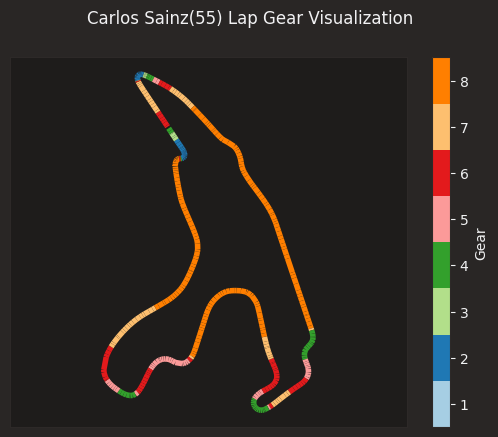

In [58]:
# need pole sitter gear and position as reference for circuit plotting

# prepare the position
x = np.array(first_pos_data['X'].values)
y = np.array(first_pos_data['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = first_car_data['nGear'].to_numpy().astype(float)

# create a line collection
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

# plotting
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(second_plot_title)

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()

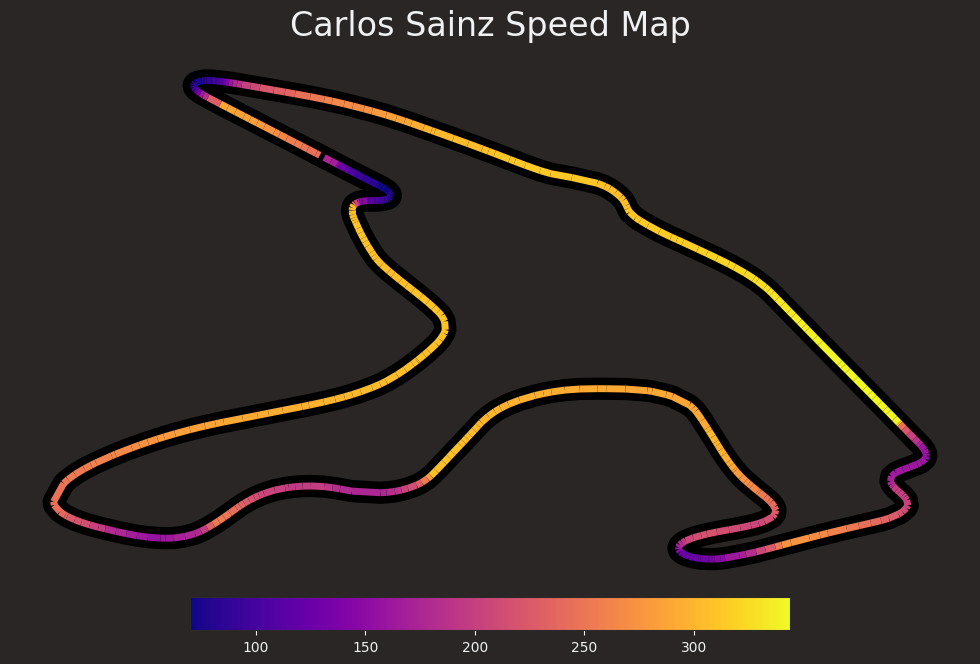

In [59]:
# Get telemetry data
x = np.array(first_pos_data['X'].values)
y = np.array(first_pos_data['Y'].values)
color = first_car_data['Speed']

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(speedmap_first_title, size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(
    np.array(first_pos_data['X'].values),
    np.array(first_pos_data['Y'].values),
    color='black',
    linestyle='-',
    linewidth=16,
    zorder=0
)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=mpl.cm.plasma, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.cm.plasma, orientation="horizontal")


# Show the plot
plt.show()